# Homework 1 (Variant 6)


In [3]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [8]:
drive.mount('/content/drive')

Mounted at /content/drive


In [9]:
pd.set_option('display.max_columns', None)

## Load and preview data

In [10]:

df = pd.read_csv("/content/drive/MyDrive/HW1_var_6.csv", sep=';', encoding='utf-8')
df.head()


,Номер варианта,ID,INCOME_BASE_TYPE,CREDIT_PURPOSE,INSURANCE_FLAG,DTI,SEX,FULL_AGE_CHILD_NUMBER,DEPENDANT_NUMBER,EDUCATION,EMPL_TYPE,EMPL_SIZE,BANKACCOUNT_FLAG,Period_at_work,age,EMPL_PROPERTY,EMPL_FORM,FAMILY_STATUS,max90days,max60days,max30days,max21days,max14days,avg_num_delay,if_zalog,num_AccountActive180,num_AccountActive90,num_AccountActive60,Active_to_All_prc,numAccountActiveAll,numAccountClosed,sum_of_paym_months,all_credits,Active_not_cc,own_closed,min_MnthAfterLoan,max_MnthAfterLoan,dlq_exist,thirty_in_a_year,sixty_in_a_year,ninety_in_a_year,thirty_vintage,sixty_vintage,ninety_vintage
0,6,1000006,Поступление зарплаты на счет,Ремонт,1.0,0.11,женский,1,0,высшее,менеджер среднего звена,>250,0.0,37.0,43.0,Другое,Иная форма,женат / замужем,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.000000,0.0,3.0,13.0,3.0,0.0,0.0,28.0,86.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,6,1000026,Поступление зарплаты на счет,Отпуск,0.0,0.33,женский,0,0,высшее,специалист,>250,0.0,16.0,34.0,Другое,ЗАО,холост / не замужем,2.0,2.0,2.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.000000,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,6,1000046,2НДФЛ,Ремонт,0.0,0.48,женский,0,0,Высшее/Второе высшее/Ученая степень,менеджер среднего звена,>250,0.0,53.0,35.0,Торговля,ООО,холост / не замужем,3.0,2.0,2.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.333333,1.0,2.0,14.0,3.0,0.0,0.0,6.0,23.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,6,1000066,Форма банка (без печати работодателя),Покупка недвижимости/ строительство,0.0,0.4,мужской,0,0,среднее-специальное,вспомогательный персонал,>250,0.0,36.0,30.0,Транспорт,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,6,1000086,2НДФЛ,Покупка недвижимости/ строительство,1.0,0.36,мужской,1,0,среднее-специальное,рабочий,>250,0.0,49.0,26.0,Информационные технологии,ЗАО,женат / замужем,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.000000,0.0,5.0,47.0,5.0,0.0,4.0,17.0,52.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [14]:

df.info()
df.describe(include='all').T


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10243 entries, 0 to 10242
Data columns (total 42 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   INCOME_BASE_TYPE       10157 non-null  object 
 1   CREDIT_PURPOSE         10243 non-null  object 
 2   INSURANCE_FLAG         10243 non-null  bool   
 3   DTI                    10095 non-null  float64
 4   SEX                    10243 non-null  object 
 5   FULL_AGE_CHILD_NUMBER  10243 non-null  int64  
 6   DEPENDANT_NUMBER       10243 non-null  int64  
 7   EDUCATION              10212 non-null  object 
 8   EMPL_TYPE              10233 non-null  object 
 9   EMPL_SIZE              10095 non-null  object 
 10  BANKACCOUNT_FLAG       7890 non-null   float64
 11  Period_at_work         7888 non-null   float64
 12  age                    7890 non-null   float64
 13  EMPL_PROPERTY          7890 non-null   object 
 14  EMPL_FORM              3953 non-null   object 
 15  FA

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
INCOME_BASE_TYPE,10157,4,2НДФЛ,3208,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CREDIT_PURPOSE,10243,10,Ремонт,5599,NaN,NaN,NaN,NaN,NaN,NaN,NaN
INSURANCE_FLAG,10243,2,True,6161,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DTI,10095.0,NaN,NaN,NaN,0.384428,0.137959,0.02,0.28,0.4,0.49,0.59
SEX,10243,2,мужской,5637,NaN,NaN,NaN,NaN,NaN,NaN,NaN
FULL_AGE_CHILD_NUMBER,10243.0,NaN,NaN,NaN,0.562433,0.771415,0.0,0.0,0.0,1.0,5.0
DEPENDANT_NUMBER,10243.0,NaN,NaN,NaN,0.003905,0.082579,0.0,0.0,0.0,0.0,4.0
EDUCATION,10212,8,высшее,5767,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EMPL_TYPE,10233,9,специалист,3715,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EMPL_SIZE,10095,6,>250,6289,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Basic information and missing values

Since variant number isn't useful and client ids are unique and give no information we can drop them

In [11]:
df = df.drop(columns=['Номер варианта', 'ID'])

While looking at data, incorrect null values, characters and abundant categories were fixed or removed.

Data types of columns were also fixed to avoid potential mistakes

In [12]:
df['EDUCATION'] = df['EDUCATION'].replace('*n.a.*', np.nan)
df['EMPL_SIZE'] = df['EMPL_SIZE'].replace('*n.a.*', np.nan)
df['EMPL_SIZE'] = df['EMPL_SIZE'].replace('>100', '>=100')
df['DTI'] = df['DTI'].replace('#ПОЛЕ!', np.nan)
df['DTI'] = pd.to_numeric(df['DTI'], errors='coerce')

df['if_zalog'] = df['if_zalog'].astype(bool)
df['dlq_exist'] = df['dlq_exist'].astype(bool)
df['INSURANCE_FLAG'] = df['INSURANCE_FLAG'].astype(bool)
df['thirty_in_a_year'] = df['thirty_in_a_year'].astype(bool)
df['sixty_in_a_year'] = df['sixty_in_a_year'].astype(bool)
df['ninety_in_a_year'] = df['ninety_in_a_year'].astype(bool)
df['thirty_vintage'] = df['thirty_vintage'].astype(bool)
df['sixty_vintage'] = df['sixty_vintage'].astype(bool)
df['ninety_vintage'] = df['ninety_vintage'].astype(bool)


In [13]:
total_rows = len(df)

summary = pd.DataFrame({
    'NaN_count': df.isna().sum(),
    'NaN_%': df.isna().sum() / total_rows * 100,
    'Zero_count': (df == 0).sum(),
    'Zero_%': (df == 0).sum() / total_rows * 100,
    'dtype': df.dtypes
})

summary.T


,INCOME_BASE_TYPE,CREDIT_PURPOSE,INSURANCE_FLAG,DTI,SEX,FULL_AGE_CHILD_NUMBER,DEPENDANT_NUMBER,EDUCATION,EMPL_TYPE,EMPL_SIZE,BANKACCOUNT_FLAG,Period_at_work,age,EMPL_PROPERTY,EMPL_FORM,FAMILY_STATUS,max90days,max60days,max30days,max21days,max14days,avg_num_delay,if_zalog,num_AccountActive180,num_AccountActive90,num_AccountActive60,Active_to_All_prc,numAccountActiveAll,numAccountClosed,sum_of_paym_months,all_credits,Active_not_cc,own_closed,min_MnthAfterLoan,max_MnthAfterLoan,dlq_exist,thirty_in_a_year,sixty_in_a_year,ninety_in_a_year,thirty_vintage,sixty_vintage,ninety_vintage
NaN_count,86,0,0,148,0,0,0,31,10,148,2353,2355,2353,2353,6290,6290,6350,6350,6350,6350,6350,6642,0,6627,6627,6627,6627,6627,6627,6627,6627,6627,6627,6627,6627,0,0,0,0,0,0,0
NaN_%,0.839598,0.0,0.0,1.444889,0.0,0.0,0.0,0.302646,0.097628,1.444889,22.971786,22.991311,22.971786,22.971786,61.407791,61.407791,61.993557,61.993557,61.993557,61.993557,61.993557,64.844284,0.0,64.697842,64.697842,64.697842,64.697842,64.697842,64.697842,64.697842,64.697842,64.697842,64.697842,64.697842,64.697842,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Zero_count,0,0,4082,0,0,6068,10214,0,0,0,6229,0,0,0,0,0,1039,1522,1968,2350,2529,1560,2435,2573,3138,3322,470,451,425,17,0,1229,2058,129,7,1575,3062,3298,3377,3519,3575,3577
Zero_%,0.0,0.0,39.851606,0.0,0.0,59.240457,99.71688,0.0,0.0,0.0,60.812262,0.0,0.0,0.0,0.0,0.0,10.143513,14.858928,19.213121,22.942497,24.690032,15.229913,23.772332,25.119594,30.635556,32.431905,4.588499,4.403007,4.149175,0.165967,0.0,11.998438,20.09177,1.259397,0.068339,15.376355,29.893586,32.197598,32.968857,34.355169,34.901884,34.92141
dtype,object,object,bool,float64,object,int64,int64,object,object,object,float64,float64,float64,object,object,object,float64,float64,float64,float64,float64,float64,bool,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,bool,bool,bool,bool,bool,bool,bool


In [15]:

missing = df.isna().sum().sort_values(ascending=False)
missing[missing>0]


,0
avg_num_delay,6642
own_closed,6627
max_MnthAfterLoan,6627
numAccountActiveAll,6627
numAccountClosed,6627
sum_of_paym_months,6627
num_AccountActive90,6627
num_AccountActive60,6627
num_AccountActive180,6627
min_MnthAfterLoan,6627


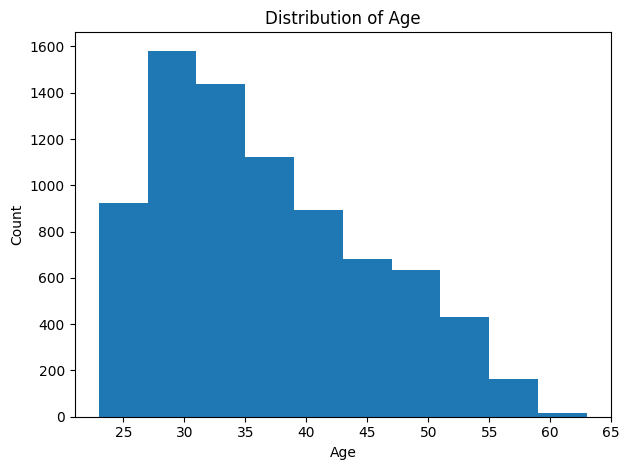

In [16]:
df['age'].hist(bins=10)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.tight_layout()
plt.grid(False)
plt.show()

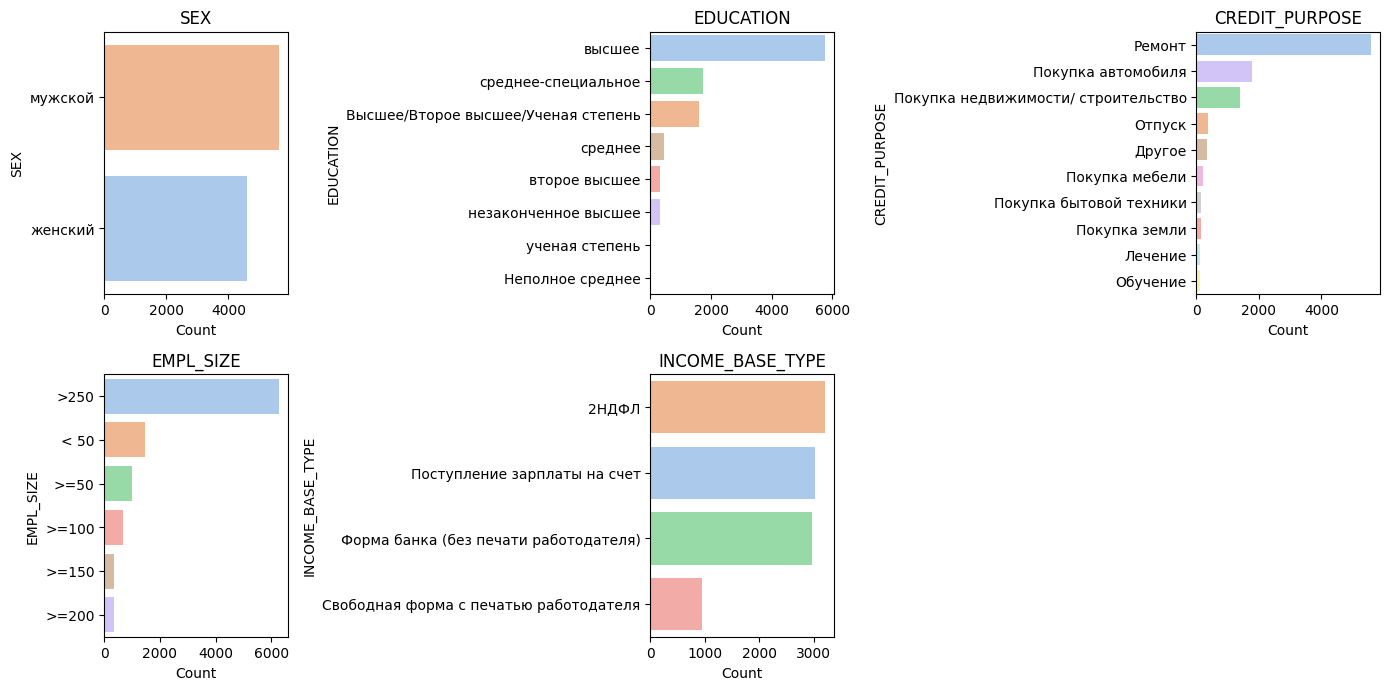

In [17]:

cat_cols = ['SEX', 'EDUCATION', 'CREDIT_PURPOSE', 'EMPL_SIZE', 'INCOME_BASE_TYPE']

plt.figure(figsize=(14, 10))
for i, col in enumerate(cat_cols, 1):
    plt.subplot(3, 3, i)
    sns.countplot(y=df[col], order=df[col].value_counts().index, hue=df[col],
                  palette='pastel', legend=False)
    plt.title(f"{col}")
    plt.xlabel("Count")
    plt.ylabel(col)
plt.tight_layout()
plt.show()



### More cleaning and preparation

While looking at data with Excel, I noticed that the binary columns data was either complete or almost fully missing. To avoid rows with so much missing data, we get rid of the rows with a lot of data loss.

After the cut the data is almost complete, so the blanks are filled with median values.

Ordinal categories are encoded manually and others one-hot encoded.

In [18]:

df = df.drop_duplicates()
df = df.dropna(thresh=int(0.7 * df.shape[1]))
df = df.fillna(df.median(numeric_only=True))

education_map = {
    'Неполное среднее': 1,
    'среднее': 2,
    'среднее-специальное': 3,
    'незаконченное высшее': 4,
    'высшее': 5,
    'Высшее/Второе высшее/Ученая степень': 6,
    'второе высшее': 6,
    'ученая степень': 7
}

salary_map = {
    '>250': 6,
    '< 50': 1,
    '>=50': 2,
    '>=100': 3,
    '>=200': 5,
    '>=150': 4
}

df['EDUCATION'] = df['EDUCATION'].map(education_map).fillna(0)
df['EMPL_SIZE'] = df['EMPL_SIZE'].map(salary_map).fillna(0)
cat_cols = df.select_dtypes(include='object').columns.drop('EDUCATION', errors='ignore')
df = pd.get_dummies(df, columns=cat_cols, drop_first=True)
df = df.astype({c: int for c in df.select_dtypes('bool').columns})

df.head()



,INSURANCE_FLAG,DTI,FULL_AGE_CHILD_NUMBER,DEPENDANT_NUMBER,EDUCATION,EMPL_SIZE,BANKACCOUNT_FLAG,Period_at_work,age,max90days,max60days,max30days,max21days,max14days,avg_num_delay,if_zalog,num_AccountActive180,num_AccountActive90,num_AccountActive60,Active_to_All_prc,numAccountActiveAll,numAccountClosed,sum_of_paym_months,all_credits,Active_not_cc,own_closed,min_MnthAfterLoan,max_MnthAfterLoan,dlq_exist,thirty_in_a_year,sixty_in_a_year,ninety_in_a_year,thirty_vintage,sixty_vintage,ninety_vintage,INCOME_BASE_TYPE_Поступление зарплаты на счет,INCOME_BASE_TYPE_Свободная форма с печатью работодателя,INCOME_BASE_TYPE_Форма банка (без печати работодателя),CREDIT_PURPOSE_Лечение,CREDIT_PURPOSE_Обучение,CREDIT_PURPOSE_Отпуск,CREDIT_PURPOSE_Покупка автомобиля,CREDIT_PURPOSE_Покупка бытовой техники,CREDIT_PURPOSE_Покупка земли,CREDIT_PURPOSE_Покупка мебели,CREDIT_PURPOSE_Покупка недвижимости/ строительство,CREDIT_PURPOSE_Ремонт,SEX_мужской,EMPL_TYPE_другое,EMPL_TYPE_менеджер высшего звена,EMPL_TYPE_менеджер по продажам,EMPL_TYPE_менеджер среднего звена,EMPL_TYPE_рабочий,EMPL_TYPE_специалист,EMPL_TYPE_страховой агент,EMPL_TYPE_торговый представитель,EMPL_PROPERTY_Информационные технологии,EMPL_PROPERTY_Сельское и лесное хозяйство,EMPL_PROPERTY_Торговля,EMPL_PROPERTY_Юридические услуги,EMPL_FORM_ЗАО,EMPL_FORM_Иная форма,EMPL_FORM_Индивидуальный предприниматель,EMPL_FORM_ОАО,EMPL_FORM_ООО,FAMILY_STATUS_гражданский брак,FAMILY_STATUS_женат / замужем,FAMILY_STATUS_повторный брак,FAMILY_STATUS_разведен / разведена,FAMILY_STATUS_холост / не замужем
0,1,0.11,1,0,5.0,6.0,0.0,37.0,43.0,0.0,0.0,0.0,0.0,0.0,0.000000,1,0.0,0.0,0.0,0.000000,0.0,3.0,13.0,3.0,0.0,0.0,28.0,86.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0
1,0,0.33,0,0,5.0,6.0,0.0,16.0,34.0,2.0,2.0,2.0,1.0,0.0,0.000000,0,1.0,1.0,1.0,1.000000,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
2,0,0.48,0,0,6.0,6.0,0.0,53.0,35.0,3.0,2.0,2.0,1.0,1.0,0.000000,0,0.0,0.0,0.0,0.333333,1.0,2.0,14.0,3.0,0.0,0.0,6.0,23.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1
4,1,0.36,1,0,3.0,6.0,0.0,49.0,26.0,0.0,0.0,0.0,0.0,0.0,0.000000,1,0.0,0.0,0.0,0.000000,0.0,5.0,47.0,5.0,0.0,4.0,17.0,52.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0
5,1,0.52,1,0,5.0,6.0,3.0,19.0,30.0,1.0,1.0,1.0,1.0,1.0,0.170732,0,0.0,0.0,0.0,0.444444,4.0,5.0,102.0,9.0,3.0,0.0,12.0,94.0,1,1,1,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0


## Segmentation 1 — Quantile-based (RFM-like)

In [19]:

cols = df.select_dtypes(include=np.number).columns[:3]
rfm = df[cols].copy()
rfm.columns = ['Recency','Frequency','Monetary'][:len(cols)]

rfm_q = rfm.rank(pct=True)
rfm_q['Segment'] = (rfm_q.sum(axis=1)*5/3).round().astype(int)
rfm_q['Segment'] = rfm_q['Segment'].clip(1,5)
rfm_q['Segment'].value_counts().sort_index()


,count
Segment,
1,400
2,1568
3,1529
4,400


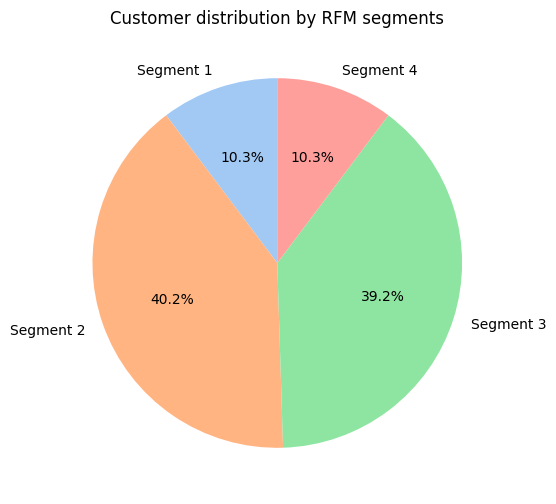

In [20]:
rfm_counts = rfm_q['Segment'].value_counts().sort_index()
labels = [f"Segment {i}" for i in rfm_counts.index]
plt.figure(figsize=(6,6))
plt.pie(rfm_counts, labels=labels, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'))
plt.title('Customer distribution by RFM segments')
plt.show()


In [28]:

df_rfm = df.copy()
df_rfm['Segment'] = rfm_q['Segment']

rfm_means = df_rfm.groupby('Segment').mean(numeric_only=True).round(2)

rfm_means


,INSURANCE_FLAG,DTI,FULL_AGE_CHILD_NUMBER,DEPENDANT_NUMBER,EDUCATION,EMPL_SIZE,BANKACCOUNT_FLAG,Period_at_work,age,max90days,max60days,max30days,max21days,max14days,avg_num_delay,if_zalog,num_AccountActive180,num_AccountActive90,num_AccountActive60,Active_to_All_prc,numAccountActiveAll,numAccountClosed,sum_of_paym_months,all_credits,Active_not_cc,own_closed,min_MnthAfterLoan,max_MnthAfterLoan,dlq_exist,thirty_in_a_year,sixty_in_a_year,ninety_in_a_year,thirty_vintage,sixty_vintage,ninety_vintage,INCOME_BASE_TYPE_Поступление зарплаты на счет,INCOME_BASE_TYPE_Свободная форма с печатью работодателя,INCOME_BASE_TYPE_Форма банка (без печати работодателя),CREDIT_PURPOSE_Лечение,CREDIT_PURPOSE_Обучение,CREDIT_PURPOSE_Отпуск,CREDIT_PURPOSE_Покупка автомобиля,CREDIT_PURPOSE_Покупка бытовой техники,CREDIT_PURPOSE_Покупка земли,CREDIT_PURPOSE_Покупка мебели,CREDIT_PURPOSE_Покупка недвижимости/ строительство,CREDIT_PURPOSE_Ремонт,SEX_мужской,EMPL_TYPE_другое,EMPL_TYPE_менеджер высшего звена,EMPL_TYPE_менеджер по продажам,EMPL_TYPE_менеджер среднего звена,EMPL_TYPE_рабочий,EMPL_TYPE_специалист,EMPL_TYPE_страховой агент,EMPL_TYPE_торговый представитель,EMPL_PROPERTY_Информационные технологии,EMPL_PROPERTY_Сельское и лесное хозяйство,EMPL_PROPERTY_Торговля,EMPL_PROPERTY_Юридические услуги,EMPL_FORM_ЗАО,EMPL_FORM_Иная форма,EMPL_FORM_Индивидуальный предприниматель,EMPL_FORM_ОАО,EMPL_FORM_ООО,FAMILY_STATUS_гражданский брак,FAMILY_STATUS_женат / замужем,FAMILY_STATUS_повторный брак,FAMILY_STATUS_разведен / разведена,FAMILY_STATUS_холост / не замужем,Cluster
Segment,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,0.00,0.24,0.00,0.0,4.97,4.82,0.29,50.87,34.52,1.33,0.97,0.71,0.54,0.46,0.05,0.45,0.23,0.10,0.06,0.38,1.80,3.22,72.08,5.01,0.85,0.76,16.59,60.67,0.54,0.22,0.18,0.16,0.13,0.12,0.13,0.40,0.08,0.33,0.01,0.01,0.06,0.19,0.02,0.01,0.03,0.09,0.53,0.53,0.0,0.11,0.03,0.21,0.04,0.42,0.0,0.04,0.13,0.00,0.56,0.01,0.14,0.03,0.03,0.08,0.71,0.06,0.43,0.01,0.04,0.46,2.29
2,0.45,0.34,0.28,0.0,4.84,4.85,0.26,53.71,35.48,1.50,1.10,0.81,0.63,0.52,0.06,0.39,0.31,0.14,0.09,0.42,2.02,3.29,73.63,5.31,0.99,0.67,14.40,62.14,0.59,0.21,0.16,0.14,0.11,0.09,0.09,0.38,0.09,0.29,0.01,0.01,0.03,0.17,0.02,0.01,0.02,0.12,0.57,0.53,0.0,0.10,0.03,0.23,0.07,0.38,0.0,0.03,0.11,0.01,0.53,0.01,0.12,0.03,0.03,0.10,0.69,0.04,0.49,0.02,0.05,0.40,2.09
3,0.82,0.43,0.70,0.0,4.56,4.75,0.31,57.02,36.18,1.72,1.20,0.89,0.68,0.56,0.06,0.34,0.38,0.14,0.09,0.43,2.34,3.58,82.86,5.92,1.14,0.66,13.02,62.68,0.60,0.21,0.15,0.13,0.09,0.08,0.07,0.36,0.10,0.28,0.02,0.01,0.03,0.16,0.01,0.02,0.02,0.14,0.54,0.49,0.0,0.08,0.02,0.21,0.10,0.36,0.0,0.02,0.07,0.01,0.57,0.01,0.13,0.02,0.03,0.11,0.67,0.04,0.60,0.03,0.06,0.27,1.99
4,1.00,0.51,1.50,0.0,4.53,4.74,0.37,61.41,36.02,1.88,1.26,0.86,0.63,0.53,0.07,0.39,0.44,0.18,0.09,0.48,2.85,3.92,96.60,6.77,1.43,0.64,11.84,64.71,0.67,0.22,0.13,0.11,0.05,0.02,0.04,0.33,0.10,0.27,0.01,0.02,0.02,0.16,0.02,0.01,0.02,0.16,0.55,0.48,0.0,0.08,0.03,0.23,0.10,0.33,0.0,0.03,0.04,0.00,0.53,0.00,0.15,0.01,0.03,0.12,0.64,0.02,0.77,0.04,0.06,0.12,1.85


# RFM Profiles

## Cluster 1 - Emerging professionals (≈ low-risk starters)
Typical age: around 34 years - the youngest among clusters.
Education: highest average education level (≈ 5 points => incomplete / higher education)
Employment: mostly in medium and large companies (EMPL_SIZE ≈ 4.8)
Income type: predominantly official salary payments (40 %)
Activity: lowest number of active accounts (≈ 1.8) and total credits (≈ 5)
Credit purpose: mostly repairs (53 %) and auto loans (19 %)
Delinquencies: minimal - lowest delay metrics
Family: split between single (46 %) and married (43 %)
=> Young, financially stable clients starting to build credit history, reliable with low debt load.

## Cluster 2 - Core salaried clients (mid-age, moderate risk)
Typical age: ≈ 35 years
Education: slightly lower (4.8 => mostly higher or specialized)
Employment: medium/large companies (4.85)
Income: still mainly official salary inflow (38 %), some informal forms (≈ 30 %)
Activity: moderate number of active accounts (≈ 2); more open loans (5.3)
Credit purposes: repairs (57 %), property purchase (12 %)
Delinquencies: slightly higher than Cluster 1 but still controlled
Family: half married (49 %), 40 % single
=> Stable, salaried mid-aged borrowers with moderate credit use and predictable repayment behavior.

##Cluster 3 - Established borrowers (active and wealth-oriented)
Typical age: ≈ 36 years
Education: noticeably lower (4.6 => mostly specialized or incomplete higher)
Employment: large firms (4.75); many specialists/managers
Income: slightly less formal (salary 36 %, bank form 28 %)
Activity: higher loan turnover (≈ 2.3 active accounts, 5.9 credits)
Credit purposes: property (14 %), repair (54 %), auto (16 %)
Delinquencies: increasing delay indicators
Family: majority married (60 %), single 27 %
=> Financially mature clients, active credit users oriented toward property and improvement; moderate risk.

## Cluster 4 - Experienced credit users (high exposure segment)
Typical age: ≈ 36 years
Education: lowest (≈ 4.5 => mostly specialized secondary)
Employment: in large companies (≈ 4.7); more managers and workers
Income: most diverse sources — salary (33 %), forms without stamp (27 %), some self-employment
Activity: highest loan counts (≈ 6.8 credits) and active accounts (≈ 2.9)
Delinquencies: highest - delay metrics and DLQ ≈ 0.67
Family: clearly settled — 77 % married
=> Mature, highly active credit users with broad loan portfolios; elevated risk due to higher debt load and delays.

## Segmentation 2 — K-Means clustering

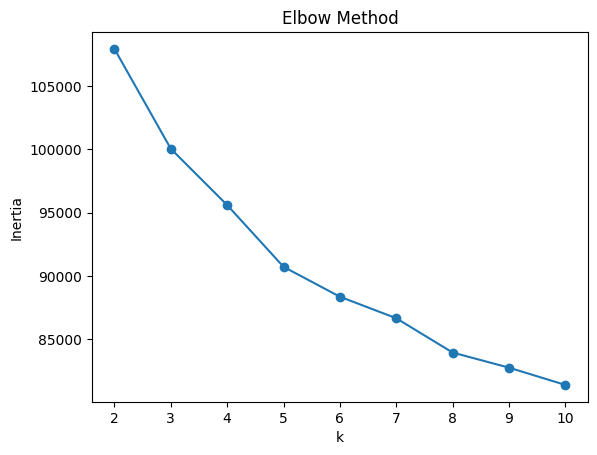

In [22]:


X = df.select_dtypes(include='number')
binary_cols = [c for c in X.columns if X[c].dropna().isin([0,1]).all()]
continuous_cols = [c for c in X.columns if c not in binary_cols]

scaler = StandardScaler()
X_scaled = X.copy()
X_scaled[continuous_cols] = scaler.fit_transform(X[continuous_cols])

inertia = []
for k in range(2,11):
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(X_scaled)
    inertia.append(km.inertia_)

plt.plot(range(2,11), inertia, marker='o')
plt.xlabel('k'); plt.ylabel('Inertia'); plt.title('Elbow Method')
plt.show()


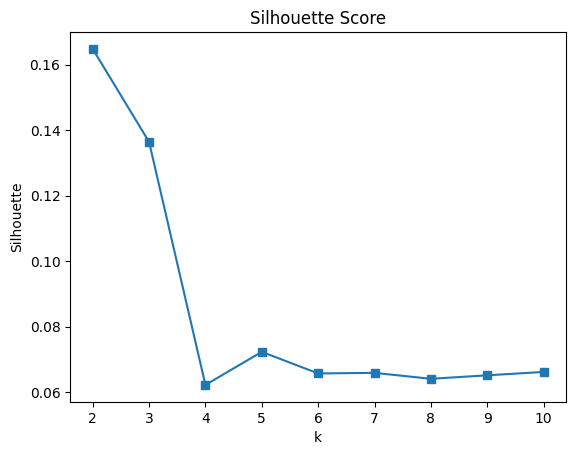

2

In [23]:

scores = []
for k in range(2,11):
    km = KMeans(n_clusters=k, random_state=42)
    labels = km.fit_predict(X_scaled)
    scores.append(silhouette_score(X_scaled, labels))

plt.plot(range(2,11), scores, marker='s')
plt.xlabel('k'); plt.ylabel('Silhouette'); plt.title('Silhouette Score')
plt.show()

best_k = range(2,11)[np.argmax(scores)]
best_k


In [24]:

kmeans = KMeans(n_clusters=5, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

df['Cluster'].value_counts()


,count
Cluster,
1,1477
4,1002
2,862
0,300
3,256


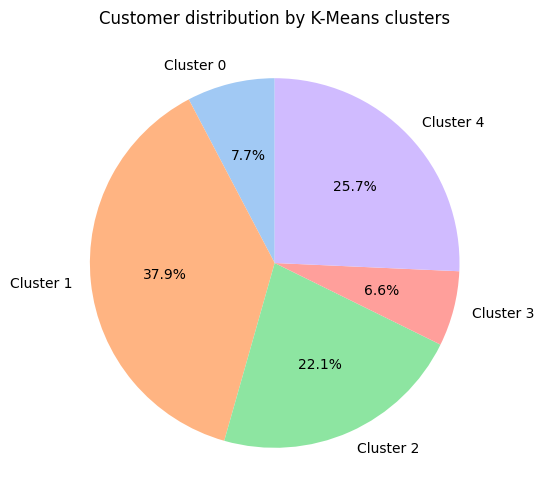

In [25]:
cluster_counts = df['Cluster'].value_counts().sort_index()

plt.figure(figsize=(6,6))
plt.pie(cluster_counts,
        labels=[f"Cluster {i}" for i in cluster_counts.index],
        autopct='%1.1f%%',
        startangle=90,
        colors=sns.color_palette('pastel'))
plt.title('Customer distribution by K-Means clusters')
plt.show()

In [29]:
cluster_means = df.groupby('Cluster').mean(numeric_only=True).round(2)
cluster_means

,INSURANCE_FLAG,DTI,FULL_AGE_CHILD_NUMBER,DEPENDANT_NUMBER,EDUCATION,EMPL_SIZE,BANKACCOUNT_FLAG,Period_at_work,age,max90days,max60days,max30days,max21days,max14days,avg_num_delay,if_zalog,num_AccountActive180,num_AccountActive90,num_AccountActive60,Active_to_All_prc,numAccountActiveAll,numAccountClosed,sum_of_paym_months,all_credits,Active_not_cc,own_closed,min_MnthAfterLoan,max_MnthAfterLoan,dlq_exist,thirty_in_a_year,sixty_in_a_year,ninety_in_a_year,thirty_vintage,sixty_vintage,ninety_vintage,INCOME_BASE_TYPE_Поступление зарплаты на счет,INCOME_BASE_TYPE_Свободная форма с печатью работодателя,INCOME_BASE_TYPE_Форма банка (без печати работодателя),CREDIT_PURPOSE_Лечение,CREDIT_PURPOSE_Обучение,CREDIT_PURPOSE_Отпуск,CREDIT_PURPOSE_Покупка автомобиля,CREDIT_PURPOSE_Покупка бытовой техники,CREDIT_PURPOSE_Покупка земли,CREDIT_PURPOSE_Покупка мебели,CREDIT_PURPOSE_Покупка недвижимости/ строительство,CREDIT_PURPOSE_Ремонт,SEX_мужской,EMPL_TYPE_другое,EMPL_TYPE_менеджер высшего звена,EMPL_TYPE_менеджер по продажам,EMPL_TYPE_менеджер среднего звена,EMPL_TYPE_рабочий,EMPL_TYPE_специалист,EMPL_TYPE_страховой агент,EMPL_TYPE_торговый представитель,EMPL_PROPERTY_Информационные технологии,EMPL_PROPERTY_Сельское и лесное хозяйство,EMPL_PROPERTY_Торговля,EMPL_PROPERTY_Юридические услуги,EMPL_FORM_ЗАО,EMPL_FORM_Иная форма,EMPL_FORM_Индивидуальный предприниматель,EMPL_FORM_ОАО,EMPL_FORM_ООО,FAMILY_STATUS_гражданский брак,FAMILY_STATUS_женат / замужем,FAMILY_STATUS_повторный брак,FAMILY_STATUS_разведен / разведена,FAMILY_STATUS_холост / не замужем
Cluster,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,0.59,0.42,0.48,0.00,4.77,4.85,0.35,51.97,35.24,2.69,1.88,1.02,0.65,0.38,0.07,0.32,1.53,1.23,1.03,0.53,3.26,3.87,79.39,7.13,1.83,0.65,0.67,57.90,0.58,0.16,0.07,0.05,0.03,0.02,0.01,0.45,0.08,0.24,0.01,0.02,0.01,0.17,0.02,0.00,0.03,0.12,0.56,0.46,0.0,0.08,0.04,0.21,0.06,0.40,0.0,0.03,0.09,0.00,0.54,0.01,0.13,0.01,0.03,0.11,0.67,0.05,0.54,0.02,0.06,0.33
1,0.62,0.39,0.43,0.00,4.68,5.17,0.32,40.92,33.17,1.15,0.80,0.64,0.50,0.44,0.05,0.37,0.26,0.04,0.00,0.60,2.05,1.74,47.59,3.78,0.98,0.23,11.19,46.15,0.53,0.25,0.22,0.20,0.18,0.17,0.17,0.48,0.09,0.17,0.01,0.01,0.04,0.18,0.02,0.02,0.02,0.11,0.54,0.48,0.0,0.05,0.03,0.19,0.09,0.41,0.0,0.03,0.10,0.01,0.57,0.01,0.12,0.02,0.02,0.08,0.72,0.04,0.50,0.02,0.04,0.40
2,0.59,0.43,0.65,0.00,4.96,4.59,0.22,73.32,38.30,1.69,0.99,0.65,0.41,0.33,0.06,0.45,0.45,0.10,0.01,0.37,3.71,6.74,159.18,10.45,1.89,1.25,8.56,85.84,0.81,0.24,0.13,0.10,0.04,0.01,0.01,0.22,0.08,0.48,0.02,0.01,0.03,0.10,0.01,0.01,0.02,0.13,0.64,0.51,0.0,0.14,0.02,0.27,0.07,0.34,0.0,0.03,0.08,0.01,0.52,0.00,0.13,0.02,0.03,0.14,0.64,0.04,0.61,0.02,0.06,0.27
3,0.68,0.41,0.44,0.02,4.80,4.63,0.59,42.04,34.56,5.74,5.04,4.20,3.60,3.00,0.07,0.39,0.34,0.11,0.05,0.42,2.24,3.65,75.11,5.89,1.06,0.29,13.20,61.39,0.64,0.31,0.23,0.19,0.16,0.14,0.14,0.16,0.18,0.13,0.01,0.00,0.02,0.17,0.02,0.02,0.02,0.13,0.57,0.54,0.0,0.11,0.04,0.21,0.06,0.38,0.0,0.01,0.08,0.00,0.62,0.00,0.13,0.02,0.03,0.07,0.70,0.06,0.50,0.02,0.05,0.37
4,0.58,0.31,0.65,0.00,4.50,4.46,0.23,66.18,37.66,0.83,0.56,0.39,0.29,0.25,0.07,0.33,0.02,0.00,0.00,0.18,0.82,3.01,58.95,3.83,0.31,0.94,26.33,68.04,0.50,0.14,0.09,0.07,0.02,0.02,0.02,0.36,0.10,0.35,0.02,0.02,0.04,0.21,0.03,0.01,0.02,0.15,0.49,0.55,0.0,0.10,0.02,0.23,0.10,0.34,0.0,0.02,0.09,0.01,0.53,0.02,0.13,0.03,0.03,0.11,0.66,0.03,0.60,0.03,0.07,0.26


# KMeans Profiles

## Cluster 0 - Moderately active salaried clients (balanced behavior)
Age: ≈ 35 years, mid-level professionals
Education: good (≈ 4.8, higher or incomplete higher)
Employment: mainly medium/large companies (EMPL_SIZE ≈ 4.8)
Income: 45 % receive salary to bank account, few informal forms
Activity: moderately high (≈ 3.3 active accounts, 7 credits total)
Delinquencies: medium (some 30–90 day delays but not critical)
Credit purpose: mostly repairs (56 %), auto (17 %), property (12 %)
Family: 54 % married, 33 % single
=> Stable, middle-aged clients with regular salaries and balanced credit use. Low to moderate risk.

## Cluster 1 - Young low-experience clients (entry segment)
Age: youngest group (≈33 years)
Education: slightly lower than average (≈ 4.7)
Employment: larger companies (EMPL_SIZE ≈ 5.2)
Income: mostly official salary (48 %), low informal sources.
Activity: limited – few active accounts (≈ 2), 3–4 credits total
Delinquencies: lowest across clusters – delay metrics minimal
Credit purpose: repairs (54 %) and auto (18 %) dominate
Family: 50 % married, 40 % single
=> Young, conservative borrowers just building credit history; low risk and low exposure.

## Cluster 2 - Mature, high-income and active borrowers
Age: around 38 years - oldest, financially established
Education: highest (≈ 5 => higher/academic)
Employment: mostly medium-size firms (4.6)
Income: mixed - 48 % via bank form, only 22 % salary transfers
Activity: very high - 3.7 active accounts, 10 credits total
Delinquencies: moderate
Collateral: often secured (if_zalog ≈ 0.45)
Family: 61 % married
=> Wealthy, financially active clients with complex loan portfolios and good repayment stability.

## Cluster 3 - High-risk clients (frequent delays, unstable income)
Age: ≈35 years
Education: slightly above average (4.8)
Employment: mostly in trade sector (62 %), medium firms (4.6)
Income: weakly formalized – only 16 % salary payments, 18 % free-form documents
Activity: moderate (≈ 2.2 active accounts, 5.9 credits) but many long delays
Delinquencies: worst across clusters; 90-day overdue ≈ 19 %
Family: half married, 37 % single
=> Financially unstable borrowers with frequent payment delays; highest default potential.

## Cluster 4 - Older stable clients (low activity, conservative)
Age: ≈38 years
Education: lowest (≈ 4.5 => specialized secondary)
Employment: smaller companies (4.5), mix of workers and mid-managers
Income: moderately formal – 36 % salary, 35 % bank-form
Activity: lowest (≈ 0.8 active accounts, 3.8 credits)
Delinquencies: minimal
Family: majority married (60 %), few singles
=> Mature, financially disciplined clients with few loans and low risk exposure.